# Experiments with kernel machines

In this notebook we will use simple two-dimensional data sets to illustrate the behavior of the support vector machine and the Perceptron, when used with quadratic and RBF kernels.

## 1. Basic training procedure

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The directory containing this notebook should also contain two-dimensional data files, `data1.txt` through `data5.txt`. These files contain one data point per line, along with a label (either -1 or 1), like:
* `3 8 -1` (meaning that point `x=(3,8)` has label `y=-1`)

The next procedure, **learn_and_display_SVM**, loads one of these data sets, invokes `sklearn.SVC` to learn a classifier, and then displays the data as well as the boundary. It is invoked as follows:
* `learn_and_display_SVM(datafile, kernel_type, C_value, s_value)`

where
* `datafile` is one of `'data1.txt'` through `'data5.txt'` (or another file in the same format)
* `kernel_type` is either `'quadratic'` or `'rbf'`
* `C_value` is the setting of the soft-margin parameter `C` (default: 1.0)
* `s_value` (for the RBF kernel) is the scaling parameter `s` (default: 1.0)

In [2]:
def learn_and_display_SVM(datafile, kernel_type='rbf', C_value=1.0, s_value=1.0):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Now train a support vector machine and identify the support vectors
    if kernel_type == 'rbf':
        clf = SVC(kernel='rbf', C=C_value, gamma=1.0/(s_value*s_value))
    if kernel_type == 'quadratic':
        clf = SVC(kernel='poly', degree=2, C=C_value, coef0=1.0)
    clf.fit(x,y)
    sv = np.zeros(n,dtype=bool)
    sv[clf.support_] = True
    notsv = np.logical_not(sv)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = clf.decision_function(grid)
    # Quantize the values to -1, -0.5, 0, 0.5, 1 for display purposes
    for i in range(len(Z)):
        Z[i] = min(Z[i],1.0)
        Z[i] = max(Z[i],-1.0)
        if (Z[i] > 0.0) and (Z[i] < 1.0):
            Z[i] = 0.5
        if (Z[i] < 0.0) and (Z[i] > -1.0):
            Z[i] = -0.5
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()

## 2. Experiments with the quadratic kernel

Let's try out SVM on some examples, starting with the quadratic kernel.

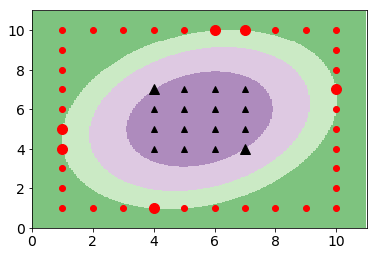

In [3]:
learn_and_display_SVM('data1.txt', 'quadratic', 1.0)

Also try `data2.txt` through `data5.txt`. Also try changing the value of `C` (the third parameter) to see how that affects the boundary and margin.

Using C 0.1 and data file data2.txt


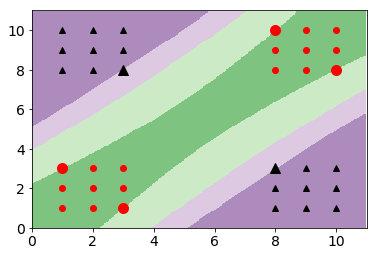

Using C 0.5 and data file data2.txt


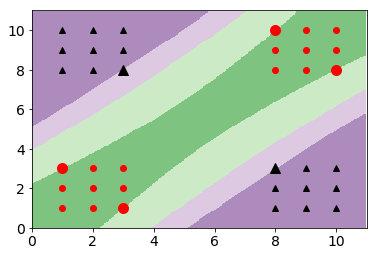

Using C 1 and data file data2.txt


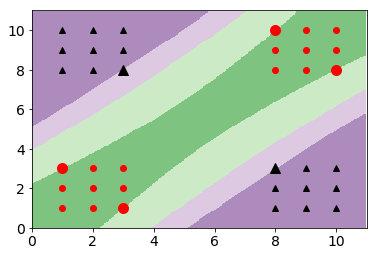

Using C 10 and data file data2.txt


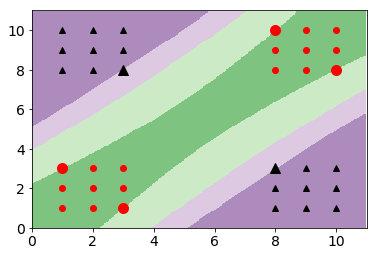

Using C 100 and data file data2.txt


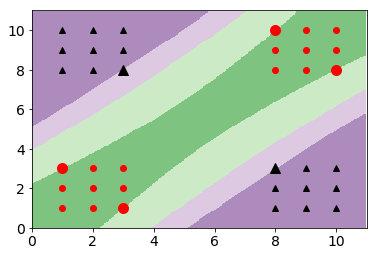

Using C 0.1 and data file data3.txt


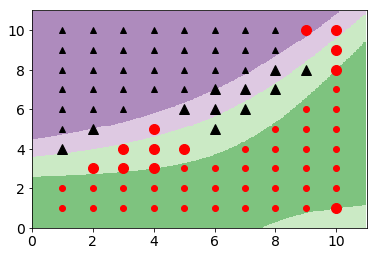

Using C 0.5 and data file data3.txt


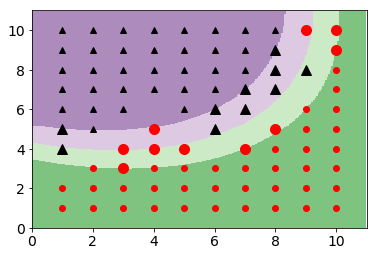

Using C 1 and data file data3.txt


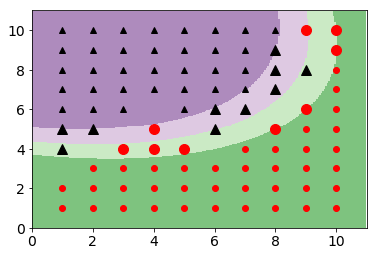

Using C 10 and data file data3.txt


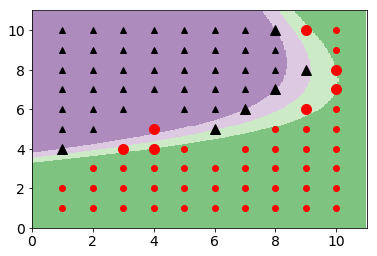

Using C 100 and data file data3.txt


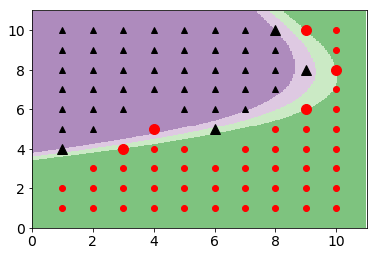

Using C 0.1 and data file data4.txt


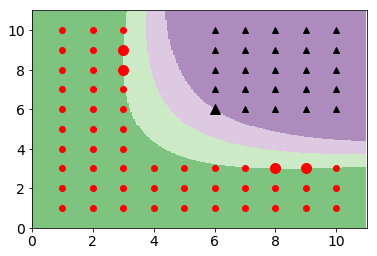

Using C 0.5 and data file data4.txt


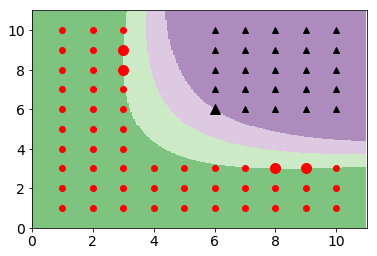

Using C 1 and data file data4.txt


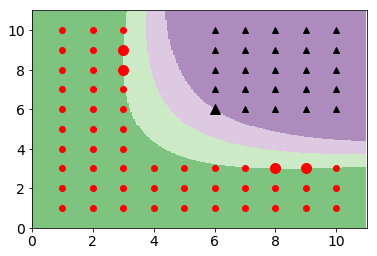

Using C 10 and data file data4.txt


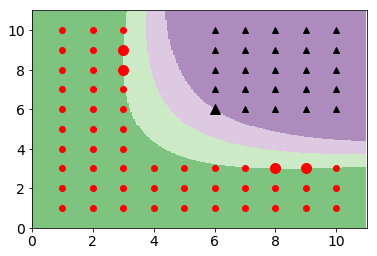

Using C 100 and data file data4.txt


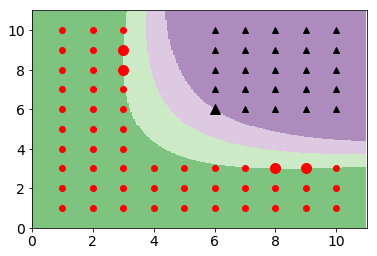

Using C 0.1 and data file data5.txt


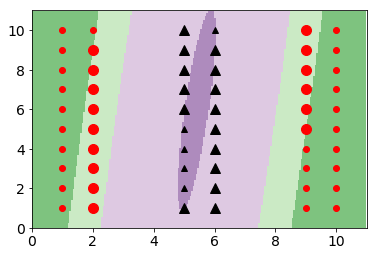

Using C 0.5 and data file data5.txt


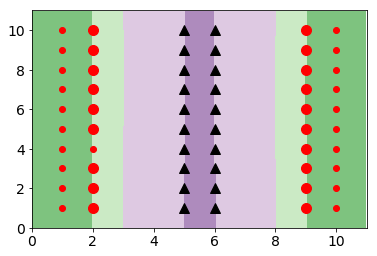

Using C 1 and data file data5.txt


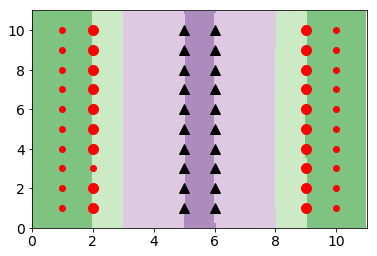

Using C 10 and data file data5.txt


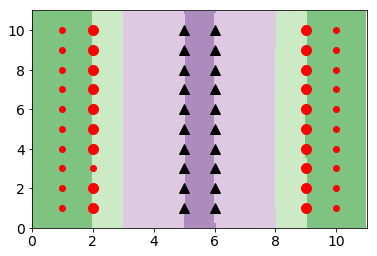

Using C 100 and data file data5.txt


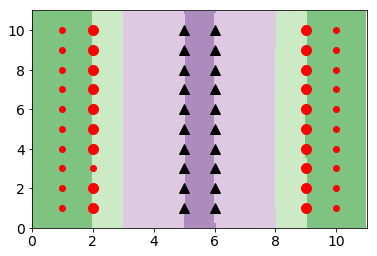

In [7]:
files = ['data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']
C = [0.1, 0.5, 1, 10, 100]
for f in files:
    for c in C:
        print('Using C', c, 'and data file', f)
        learn_and_display_SVM(f, 'quadratic', C_value = c)

## 3. Experiments with the RBF kernel

Now experiment with the RBF kernel, on the same five data sets. This time there are two parameters to play with: `C` and `sigma`.

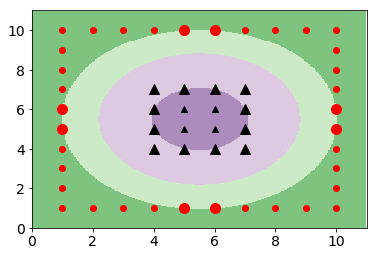

In [8]:
learn_and_display_SVM('data1.txt', 'rbf', 10.0, 10.0)

Using C 0.1 and data file data2.txt


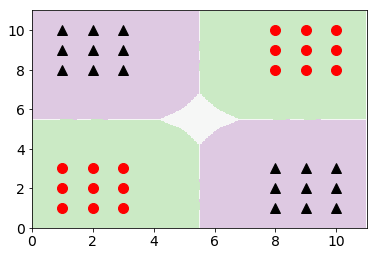

Using C 0.5 and data file data2.txt


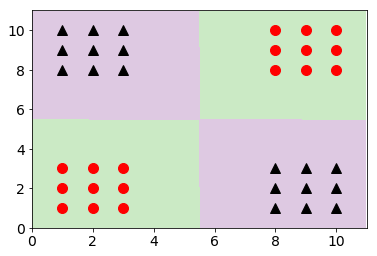

Using C 1 and data file data2.txt


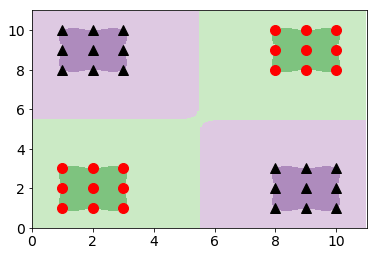

Using C 10 and data file data2.txt


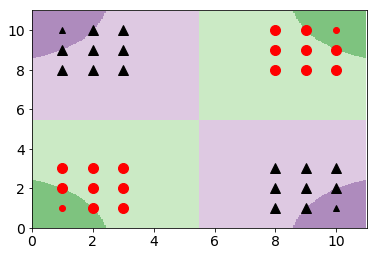

Using C 100 and data file data2.txt


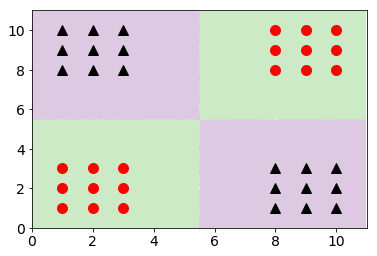

Using C 0.1 and data file data3.txt


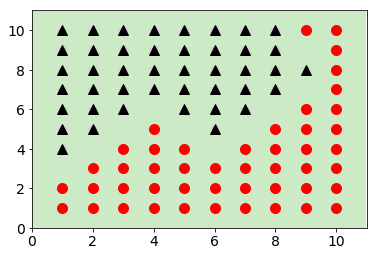

Using C 0.5 and data file data3.txt


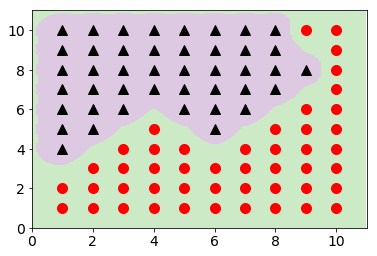

Using C 1 and data file data3.txt


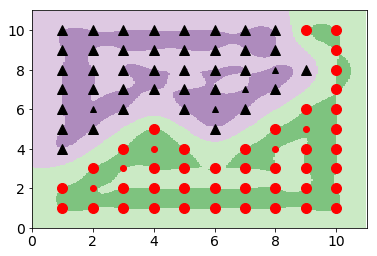

Using C 10 and data file data3.txt


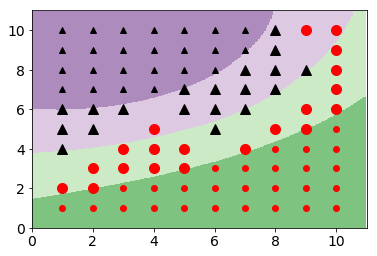

Using C 100 and data file data3.txt


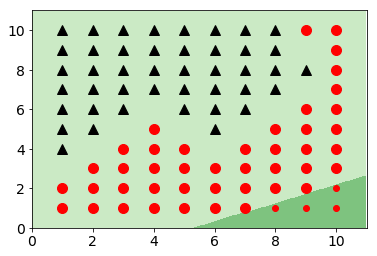

Using C 0.1 and data file data4.txt


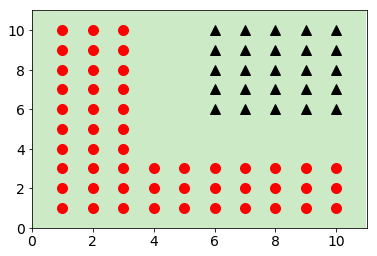

Using C 0.5 and data file data4.txt


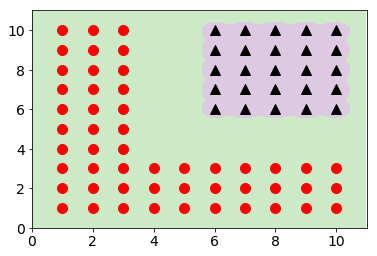

Using C 1 and data file data4.txt


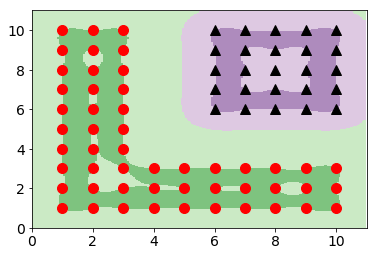

Using C 10 and data file data4.txt


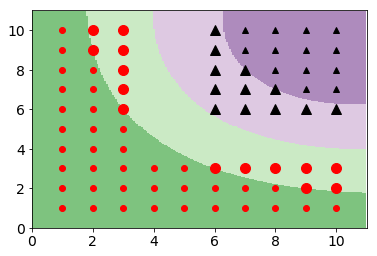

Using C 100 and data file data4.txt


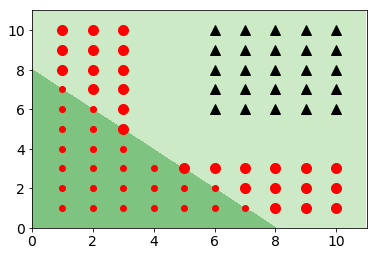

Using C 0.1 and data file data5.txt


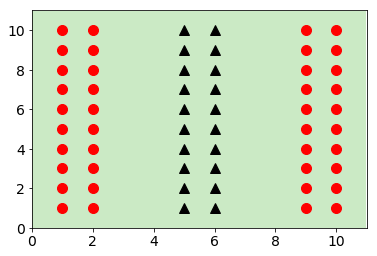

Using C 0.5 and data file data5.txt


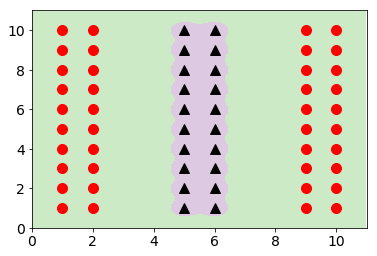

Using C 1 and data file data5.txt


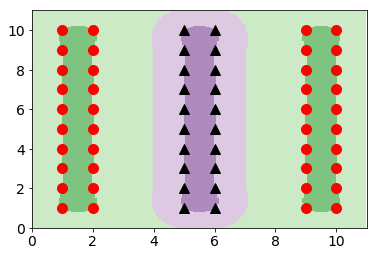

Using C 10 and data file data5.txt


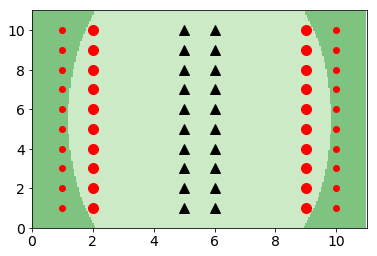

Using C 100 and data file data5.txt


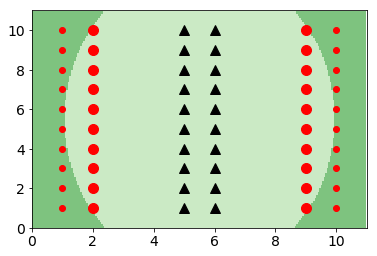

In [9]:
files = ['data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']
C = [0.1, 0.5, 1, 10, 100]
for f in files:
    for c in C:
        print('Using C', c, 'and data file', f)
        learn_and_display_SVM(f, 'rbf', s_value = c)

## 4. The kernel Perceptron

<font color="magenta">**For you to do:**</font> Implement the kernel Perceptron algorithm as specified in lecture. Your algorithm should allow both the quadratic and RBF kernel, and should follow roughly the same signature as the SVM routine above:
* `learn_and_display_Perceptron(datafile, kernel_type, s_value)`

Recall that the Perceptron algorithm does not always converge; you will need to explicitly check for this.

In [78]:
### 
### Any auxiliary functions that you need
###
def learn_and_display_Perceptron(datafile, kernel_type='rbf', s_value=1.0, max_num_iter = 100):
    ###
    ### 
    ###
    import numpy as np
    
    #
    # Following are vectorized versions of rbf and quadkernels, x is a single point and z is are multiple
    # points stacked together where each row is one point (columns form dimensions of each point). Returns the result
    # of applying kernel functions between x and n number of points in z. The returned value is a vector of size n
    #
    
    def rbf(x, z):
        return np.exp(-np.sum((x - z) ** 2, axis = 1) / s_value/ s_value)
    
    def quad(x, y):
        return (1 + np.dot(x, y.T)) ** 2
    
    k = (lambda x, z: rbf(x, z)) if kernel_type == 'rbf' else (lambda x, z: quad(x, z))
    
    loaded = np.loadtxt(datafile)
    n = loaded.shape[0]
    X, Y, alpha, b, num_iter  = loaded[:,:2], loaded[:, 2], np.zeros(n), 0, 0
    
    done = False
    import random
    #Randomize picking points
    idx = list(range(n))
    random.shuffle(idx)
    converged = False
    while not(done):
        done = True
        for i in idx:
            if Y[i] * (np.sum(alpha * Y * k(X[i, :], X)) + b) <= 0:
                done = False
                alpha[i] += 1
                b += Y[i]

        num_iter += 1
        if done:
            print('Converged after', num_iter, 'iterations')
            converged = True
        elif num_iter >= max_num_iter:
            print('Not converged even after', num_iter, 'iterations')
            done = True
            
    return alpha, b, converged

In [82]:
alpha, b, _ = learn_and_display_Perceptron('data2.txt', kernel_type='rbf', s_value=0.1, max_num_iter = 100)
print('Number of non zero weighted alpha points are', np.sum(alpha != 0), ', b is', b)

Converged after 2 iterations
Number of non zero weighted alpha points are 8 , b is 0.0


In [80]:
print('Using Quadratic kernel')
files = ['data1.txt', 'data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']
for f in files:
    alpha, b, converged = learn_and_display_Perceptron(f, kernel_type='quad', s_value=0.1, max_num_iter = 5000)
    print('Number of non zero weighted alpha points for file', f, 'are', np.sum(alpha != 0), ', b is', b, 'converged?', converged)
    

Using Quadratic kernel
Converged after 1161 iterations
Number of non zero weighted alpha points for file data1.txt are 35 , b is 2401.0 converged? True
Converged after 39 iterations
Number of non zero weighted alpha points for file data2.txt are 20 , b is 55.0 converged? True
Not converged even after 5000 iterations
Number of non zero weighted alpha points for file data3.txt are 36 , b is 5193.0 converged? False
Converged after 12 iterations
Number of non zero weighted alpha points for file data4.txt are 44 , b is 57.0 converged? True
Converged after 3227 iterations
Number of non zero weighted alpha points for file data5.txt are 49 , b is 3172.0 converged? True


In [81]:
print('Using RBF kernel')
files = ['data1.txt', 'data2.txt', 'data3.txt', 'data4.txt', 'data5.txt']
for f in files:
    alpha, b, converged = learn_and_display_Perceptron(f, kernel_type='rbf', s_value=0.1, max_num_iter = 1000)
    print('Number of non zero weighted alpha points for file', f, 'are', np.sum(alpha != 0), ', b is', b, 'converged?', converged)

Using RBF kernel
Converged after 3 iterations
Number of non zero weighted alpha points for file data1.txt are 17 , b is 0.0 converged? True
Converged after 2 iterations
Number of non zero weighted alpha points for file data2.txt are 10 , b is 0.0 converged? True
Converged after 2 iterations
Number of non zero weighted alpha points for file data3.txt are 22 , b is 0.0 converged? True
Converged after 3 iterations
Number of non zero weighted alpha points for file data4.txt are 12 , b is 0.0 converged? True
Converged after 2 iterations
Number of non zero weighted alpha points for file data5.txt are 12 , b is 0.0 converged? True


<font color="magenta">Experiment with your routine, on the same five data sets.</font>